## О подтвержденных случаях новой коронавирусной инфекции COVID-2019 в России

По умолчанию, установлена дата **20.03.2020**, как первая дата когда Роскомнадзор начал публиковать данные в виде списка по регионам.

In [24]:
import os
import csv
import pandas as pd
import numpy as np
from rkn_parser import fetch_data

DATA_DIR = '../covid19/data/daily'

In [25]:
fetch_data(start_date='23.04.2020')

Берем данные от 23.04.2020.
Process page: https://www.rospotrebnadzor.ru/about/info/news/news_details.php?ELEMENT_ID=14325&sphrase_id=2255672
Process page: https://www.rospotrebnadzor.ru/about/info/news/news_details.php?ELEMENT_ID=14323&sphrase_id=2255672
Process page: https://www.rospotrebnadzor.ru/about/info/news/news_details.php?ELEMENT_ID=14316&sphrase_id=2255672
Process page: https://www.rospotrebnadzor.ru/about/info/news/news_details.php?ELEMENT_ID=14303&sphrase_id=2255672


In [26]:
!ls -l '../covid19/data/daily'

total 352
-rw-r--r--  1 lebster  staff   509 Apr 20 11:18 2020-03-20.csv
-rw-r--r--  1 lebster  staff    19 Apr 20 11:18 2020-03-21.csv
-rw-r--r--  1 lebster  staff   393 Apr 20 11:18 2020-03-22.csv
-rw-r--r--  1 lebster  staff   159 Apr 20 11:18 2020-03-23.csv
-rw-r--r--  1 lebster  staff   770 Apr 20 11:17 2020-03-24.csv
-rw-r--r--  1 lebster  staff  1141 Apr 20 11:17 2020-03-25.csv
-rw-r--r--  1 lebster  staff  1061 Apr 20 11:17 2020-03-26.csv
-rw-r--r--  1 lebster  staff   845 Apr 20 11:17 2020-03-27.csv
-rw-r--r--  1 lebster  staff  1314 Apr 20 11:17 2020-03-28.csv
-rw-r--r--  1 lebster  staff  1303 Apr 20 11:17 2020-03-29.csv
-rw-r--r--  1 lebster  staff  1771 Apr 20 11:17 2020-03-30.csv
-rw-r--r--  1 lebster  staff  1207 Apr 20 11:17 2020-03-31.csv
-rw-r--r--  1 lebster  staff  1781 Apr 20 11:17 2020-04-01.csv
-rw-r--r--  1 lebster  staff  1464 Apr 20 11:17 2020-04-02.csv
-rw-r--r--  1 lebster  staff  1569 Apr 20 11:17 2020-04-03.csv
-rw-r--r--  1 lebster  staff  1605 Apr 20 11:

In [27]:
covid_cases = {}  # Store daily cases grouped by date.
columns = []  # Store dates to use as columns for result data frame.
files = os.listdir(DATA_DIR)
for file in files:
    if file.find('.csv') == -1:
        continue

    date = np.datetime64(file.replace('.csv', ''))
    columns.append(date)
    daily_cases_df = pd.read_csv(os.path.join(DATA_DIR, file), index_col=['region'])['cases']

    # Fix synonyms in index.
    daily_cases_df.rename(index={'Республика Горный Алтай': 'Республика Алтай'}, inplace=True)

    daily_cases = daily_cases_df.to_dict()
    covid_cases.setdefault(date, daily_cases)

# Create data frame from the daily cases.
covid_cases_df = pd.DataFrame(covid_cases, columns=np.sort(columns)).fillna(0)

# Post cleanup: remove wrong indexes.
wrong_indexes = [
    'Российской Федерации в',
    'Под медицинским наблюдением с января',
    'За последние сутки зарегистрирован',
    'За весь период выписано',
    'За сутки выписаны по выздоровлению'
]
covid_cases_df.drop(index=wrong_indexes, inplace=True, errors='ignore')

display(covid_cases_df)

,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,...,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26
Москва,33.0,0.0,54.0,0.0,28.0,120.0,1.0,157.0,114.0,197.0,...,1959.0,2649.0,3570.0,2026.0,3083.0,0.0,1959.0,2957.0,2612.0,2971.0
Республика Саха (Якутия),6.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,1.0,...,3.0,9.0,41.0,19.0,4.0,0.0,12.0,9.0,4.0,11.0
Санкт-Петербург,4.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,11.0,5.0,...,424.0,139.0,114.0,86.0,127.0,0.0,191.0,253.0,215.0,151.0
Самарская область,4.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,...,13.0,1.0,15.0,16.0,8.0,0.0,26.0,44.0,24.0,20.0
Кировская область,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,18.0,20.0,39.0,19.0,19.0,0.0,24.0,36.0,40.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ямало-Ненецкий АО –,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
Республика Хакасия –,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
Амурская область –,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
Архангельская область –,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [28]:
# Export data frame to CSV file.
# covid_cases_df.to_csv(os.path.join('../covid19/data', 'covid-cases.csv'))

In [29]:
# covid_cases_df['2020-04-19'].sum()

In [30]:
# covid_cases_df.sum()
# covid_cases_df.sum().sort_values(ascending=False)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
covid_cases_daily_df = covid_cases_df.sum().reset_index()
# covid_cases_daily_df

In [33]:
covid_cases_daily_df.columns = ['date','cases']
# covid_cases_daily_df

[Text(0, 0, '20 марта'),
 Text(0, 0, '21 марта'),
 Text(0, 0, '22 марта'),
 Text(0, 0, '23 марта'),
 Text(0, 0, '24 марта'),
 Text(0, 0, '25 марта'),
 Text(0, 0, '26 марта'),
 Text(0, 0, '27 марта'),
 Text(0, 0, '28 марта'),
 Text(0, 0, '29 марта'),
 Text(0, 0, '30 марта'),
 Text(0, 0, '31 марта'),
 Text(0, 0, '01 апреля'),
 Text(0, 0, '02 апреля'),
 Text(0, 0, '03 апреля'),
 Text(0, 0, '04 апреля'),
 Text(0, 0, '05 апреля'),
 Text(0, 0, '06 апреля'),
 Text(0, 0, '07 апреля'),
 Text(0, 0, '08 апреля'),
 Text(0, 0, '09 апреля'),
 Text(0, 0, '10 апреля'),
 Text(0, 0, '11 апреля'),
 Text(0, 0, '12 апреля'),
 Text(0, 0, '13 апреля'),
 Text(0, 0, '14 апреля'),
 Text(0, 0, '15 апреля'),
 Text(0, 0, '16 апреля'),
 Text(0, 0, '17 апреля'),
 Text(0, 0, '18 апреля'),
 Text(0, 0, '19 апреля'),
 Text(0, 0, '20 апреля'),
 Text(0, 0, '21 апреля'),
 Text(0, 0, '22 апреля'),
 Text(0, 0, '23 апреля'),
 Text(0, 0, '24 апреля'),
 Text(0, 0, '25 апреля'),
 Text(0, 0, '26 апреля')]

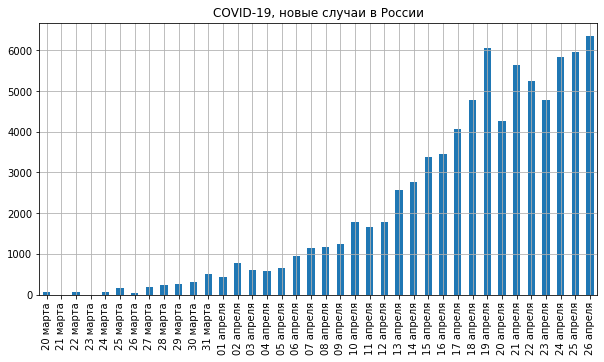

In [34]:
from datetime import datetime

def format_date(date):
    """Transform date from datetime to readable."""
    month_list = ['января', 'февраля', 'марта', 'апреля', 'мая', 'июня', 'июля', 'августа', 'сентября', 'октября', 'ноября', 'декабря']
    day = date.strftime("%d")
    month = month_list[int(date.strftime("%m")) - 1]
    return f'{day} {month}'

# Fomat date.
covid_cases_daily_df['date_fmt'] = covid_cases_daily_df['date'].apply(format_date)

bar = covid_cases_daily_df['cases'].plot(
    kind='bar', 
    grid=True, 
    title='COVID-19, новые случаи в России',
    width=0.5,
    figsize=(10, 5)
)
bar.set_xticklabels(covid_cases_daily_df['date_fmt'])

In [35]:
# Save as PNG.
fig = bar.get_figure()
# fig.savefig('../covid19/data/covid19-daily-bar.png', pad_inches=1, bbox_inches='tight', transparent=True)
fig.savefig('../covid19/data/covid19-daily-bar.png', pad_inches=1, bbox_inches='tight')

In [21]:
# Save HQ JPG image.
# fig.savefig('line_plot.jpg', dpi=300, quality=80, optimize=True, progressive=True, pad_inches=2, bbox_inches='tight')  

In [22]:
# covid_cases_df.index

In [36]:
# Sum by region.
covid_cases_df_t = covid_cases_df.transpose()
covid_cases_df_t.sum()
covid_cases_df_t.sum().sort_values(ascending=False)

Москва                       39622.0
Московская область            8405.0
Санкт-Петербург               2771.0
Москва –                      2548.0
Нижегородская область         1284.0
                              ...   
Ненецкий автономный округ        2.0
Архангельская область –          2.0
Магаданская область –            2.0
Также выписаны                   1.0
Нижегородской области и          1.0
Length: 164, dtype: float64